# Chapter 18. Neural Networks

In [91]:
from __future__ import division
from collections import Counter
from functools import partial
from linear_algebra import dot
import math, random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

An [artificial neural network](https://en.wikipedia.org/wiki/Artificial_neural_network), also known as an [ANN](https://www.doc.ic.ac.uk/~nd/surprise_96/journal/vol4/cs11/report.html) is a predictive model motivated by the way (some scientists and scholars believe) the brain operates (in theory, anyway).  
Think of the brain as a collection of neurons wired together.  
Each neuron looks at the outputs of the other neurons that feed into it, does a calculation, and then either fires (if the calculation exceeds some threshold) or doesn't fire (if the threshold is not reached).  
ANNs consist of artificial neurons which perform similar calculations over their inputs.  
Neural networks can be used to solve a wide variety of problems including handwriting recognition and face identification, and are also widely used in [deep learning](https://en.wikipedia.org/wiki/Deep_learning).  
Most neural networks are "black boxes", meaning that inspecting their details doesn't give you much understanding of *how* they are solving a problem.  
Large ANNs can also be (very) difficult to train.  
Keeping those caveats in mind, artificial neural networks can be used to do some [amazing stuff](https://gizmodo.com/these-are-the-incredible-day-dreams-of-artificial-neura-1712226908), so let's dive in.

## Perceptrons

Pretty much the simplest neural network is the [perceptron](https://en.wikipedia.org/wiki/Perceptron), which approximates a single neuron with $n$ binary inputs.  
It computes a weighted sum of its inputs and "fires" if that weighted sum is zero or greater:

In [92]:
def step_function(x):
    return 1 if x >= 0 else 0

def perceptron_output(weights, bias, x):
    """ returns 1 if the perceptron 'fires', 0 if not """
    calculation = dot(weights, x) + bias
    return step_function(calculation)

The perceptron is simply distinguishing between the half spaces separated by the hyperplane of points x for which:

With properly chosen weights, perceptrons can solve a number of simple problems:

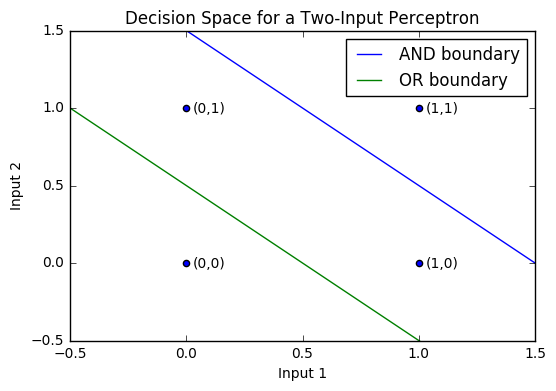

In [93]:
plt.scatter(0,1)
plt.annotate('(0,1)', xy=(0.03,0.97))
plt.scatter(1,0)
plt.annotate('(1,0)', xy=(1.03,-0.03))
plt.scatter(0,0)
plt.annotate('(0,0)', xy=(0.03,-0.03))
plt.scatter(1,1)
plt.annotate('(1,1)', xy=(1.03,0.97))
x1 = np.linspace(0, 1.5, 100)
y1 = np.linspace(1.5, 0, 100)
x2 = np.linspace(-1, 1.5, 100)
y2 = np.linspace(1.5, -1, 100)
plt.plot(x1,y1, label="AND boundary")
plt.plot(x2,y2, label="OR boundary")
plt.axis([-.5, 1.5, -.5, 1.5])
plt.title("Decision Space for a Two-Input Perceptron")
plt.xlabel("Input 1")
plt.ylabel("Input 2")
plt.legend()
plt.show()

For example, we can create an [AND gate](https://en.wikipedia.org/wiki/AND_gate) (which returns 1 if both of its inputs are 1 but returns 0 if either or both of its inputs are 0) with:

In [94]:
# If both inputs are 1, the `calculation` equals 2 + 2 - 3 = 1, and the output is 1:
print perceptron_output([2,2],-3,[1,1])

# If only one of the inputs is 1, the `calculation` equals 2 + 0 - 3 = -1, and the output is 0:
print perceptron_output([2,2],-3,[1,0])
print perceptron_output([2,2],-3,[0,1])

# If both inputs are 0, the `calculation` equals 0 + 0 - 3 = -3, and the output is 0:
print perceptron_output([2,2],-3,[0,0])

1
0
0
0


Similarly, we can build an [OR gate](https://en.wikipedia.org/wiki/OR_gate) with:

We could also build a [NOT gate](https://en.wikipedia.org/wiki/Inverter_%28logic_gate%29) (which has one input and converts 1 to 0 and 0 to 1) with:

However, there are some problems that simply can't be solved by a a single perceptron.  
For example, no matter how hard you try, you cannot use a perceptron to build an [XOR gate](https://en.wikipedia.org/wiki/XOR_gate) that outputs 1 if exactly one of its inputs is 1 and 0 otherwise.  
This is where we start needing more sophisticated (and complicated) neural networks.

You don't need to approximate a neuron in order to build a logic gate:

Like real neurons, artificial neurons become more interesting when you start connecting them together.

## Feed-Forward Neural Networks 